In [1]:
from matplotlib.pyplot import title

from ms.metaresearch.isa import InstanceSpaceAnalysis
from ms.pipeline.pipeline_constants import *

isa = InstanceSpaceAnalysis(n_tries=10)
selectors_to_use = ["base", "corr", "f_val", "mi", "xgb", "lasso", "rfe", "te", "cf"]
selectors = [all_handlers[selector][1] for selector in selectors_to_use if selector != "rfe"]
selectors += [i for i in rfe_selectors.values()]
metrics_suffixes = ["perf_abs", "perf_rel", "diff"]
features_suffixes = ["power"]

D:\python_projects\MetaSelect\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
selectors_res = []

In [3]:
for features_suffix in features_suffixes:
    print(features_suffix)
    for metrics_suffix in metrics_suffixes:
        print(metrics_suffix)
        for selector in selectors:
            print(selector.class_name)
            selector.perform(
                features_suffix=features_suffix,
                metrics_suffix=metrics_suffix,
                to_rewrite=False,
            )

power
perf_abs
base
correlation
f_value
mutual_info
xgb
lasso
treatment_effect
counterfactual
rfe
rfe
rfe
perf_rel
base
correlation
f_value
mutual_info
xgb
lasso
treatment_effect
Slice: 123
Iteration: 0
Fold: 0



KeyboardInterrupt



In [6]:
import pandas as pd
from ms.metaresearch.isa import PILOTResult


def plot(
        res: PILOTResult,
        features: pd.DataFrame,
        target_bin: pd.DataFrame,
        selector_name: str,
):
    m = []
    summary = res.summary
    for i in range(summary.shape[0]):
        m.append([summary.iloc[i, 0], summary.iloc[i, 1]])
    z = pd.DataFrame(m)
    z.index = features.columns
    z.columns = ["z1", "z2"]
    features.dot(z).plot.scatter(
        x="z1",
        y="z2",
        c=[("green" if i == True else "red") for i in target_bin.iloc[:, 0]],
        title=f"{target_bin.columns[0]}_{selector_name}",
        label=(res.error, res.error / features.shape[1]),
    )

-------------------
base
-------------------
Started PILOT
Performing BFGS optimization
Computing z1, z2
                                                    z1      z2
f__pymfe.landmarking.naive_bayes.sd            -0.2377 -0.3091
f__pymfe.landmarking.worst_node.sd             -0.2132 -0.2703
f__pymfe.model-based.leaves_per_class.skewness  0.0649 -0.2068
f__pymfe.model-based.tree_shape.sd             -0.2564 -0.2761
f__pymfe.statistical.cor.sd                     0.1481 -0.2657
f__pymfe.statistical.gravity                    0.2113 -0.3714
f__pymfe.statistical.iq_range.skewness          0.3318 -0.3202
f__pymfe.statistical.kurtosis.min               0.1501 -0.1979
f__pymfe.statistical.mad.min                   -0.1682 -0.0171
f__pymfe.statistical.t_mean.kurtosis            0.3223 -0.2624
-------------------
correlation
-------------------
Started PILOT
Performing BFGS optimization
Computing z1, z2
                                          z1      z2
f__pymfe.general.freq_class.kurtosis 

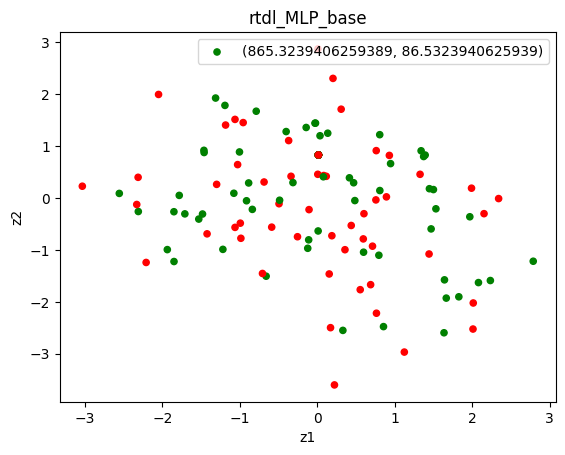

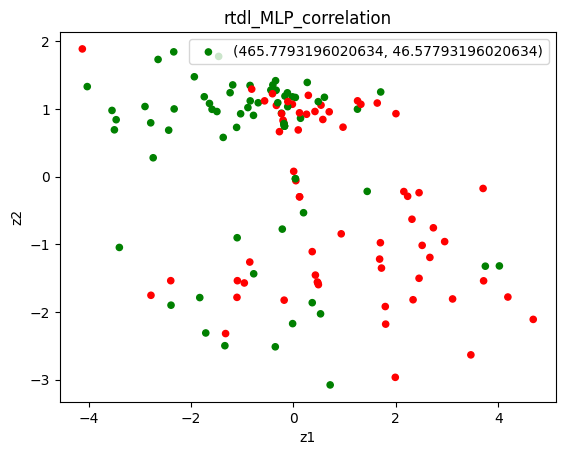

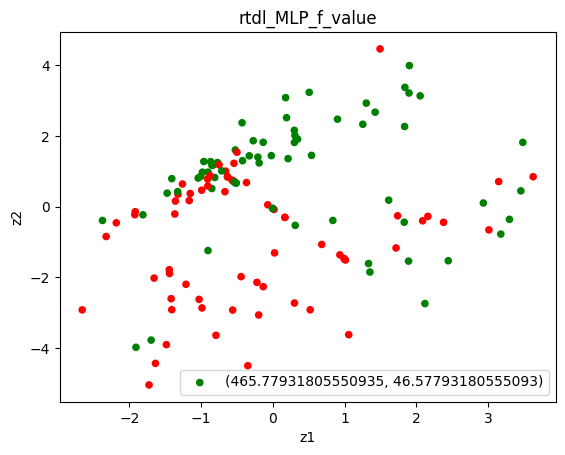

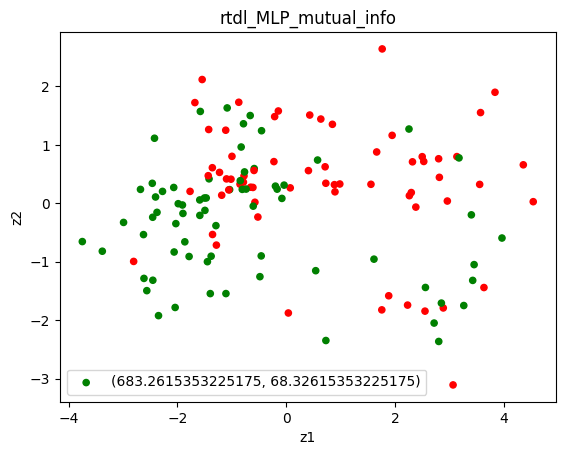

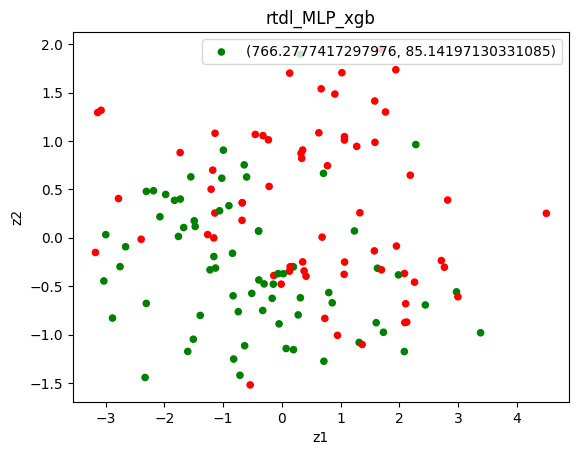

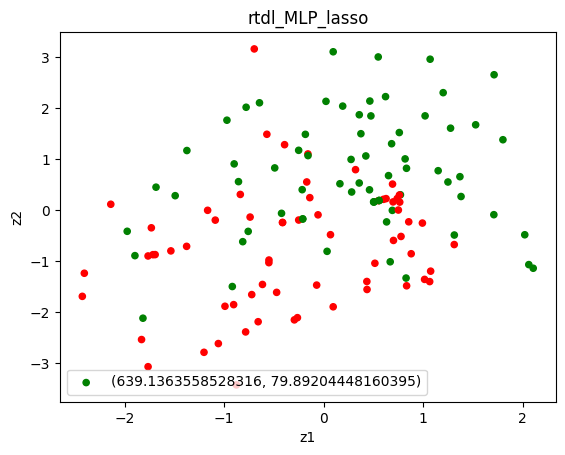

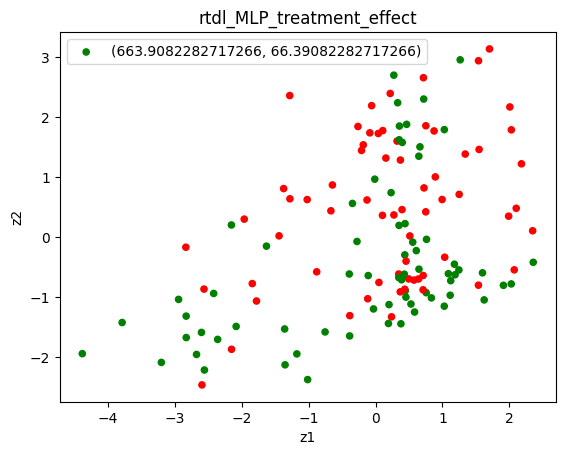

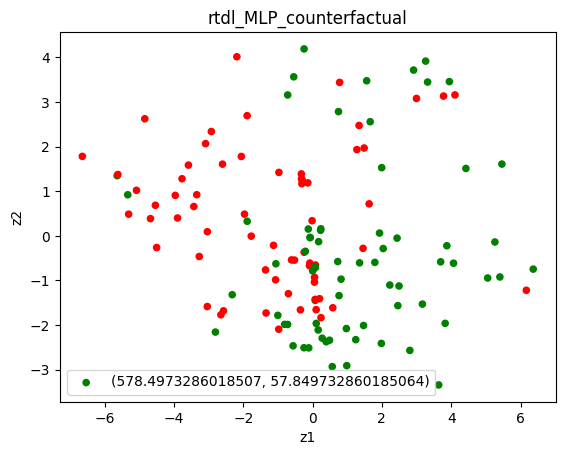

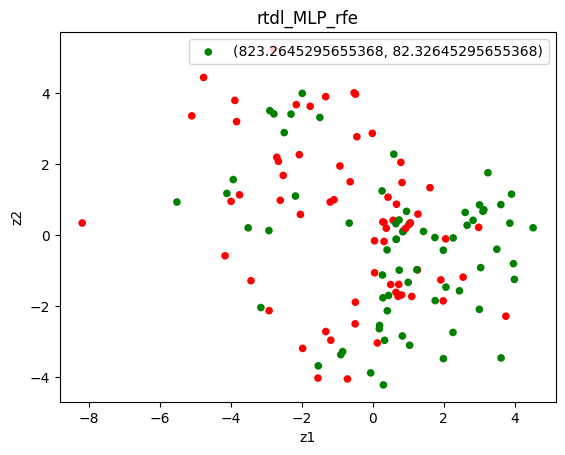

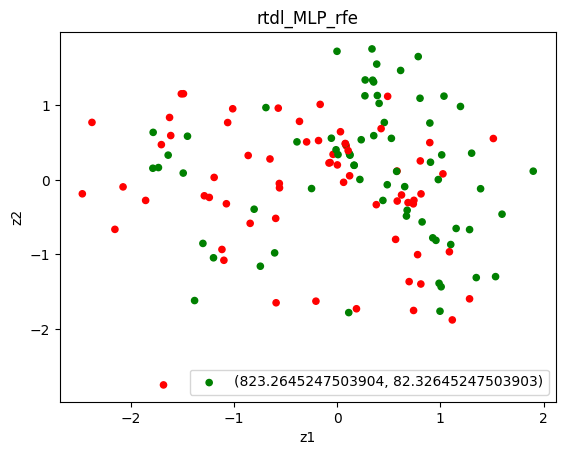

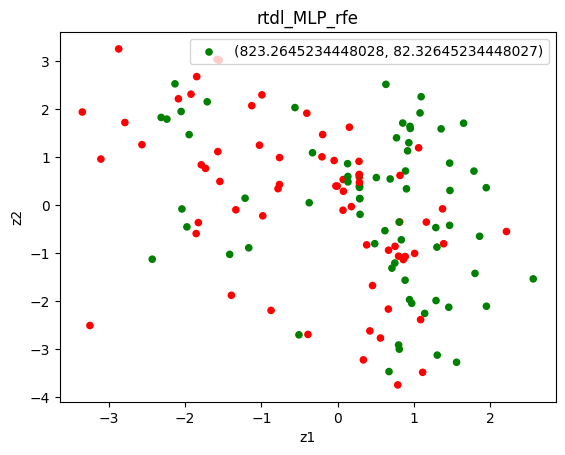

In [10]:
target_model = "rtdl_MLP"
for selector in selectors:
    print("-------------------")
    print(selector.class_name)
    print("-------------------")
    features, target_bin = meta_learner.load_data(
        features_suffix="power",
        metrics_suffix="perf_abs",
        selector=selector,
        target_model=target_model
    )

    raw_metrics = meta_learner.load_metrics(suffix="raw").loc[:, target_model].to_frame(name=target_model)
    
    res = isa.pilot(
        features=features.iloc[:, :10],
        metrics=raw_metrics,
    )
    selectors_res.append(res)
    print(res.summary.sort_index(axis="index", ascending=True, inplace=False))
    plot(
        res=res,
        features=features.iloc[:, :10],
        target_bin=target_bin,
        selector_name=selector.class_name
    )

-------------------
base
-------------------
Started PILOT
Performing BFGS optimization
Computing z1, z2
                                                    z1      z2
f__pymfe.landmarking.naive_bayes.sd             0.4496  0.0587
f__pymfe.landmarking.worst_node.sd              0.4356  0.0838
f__pymfe.model-based.leaves_per_class.skewness  0.0398  0.2152
f__pymfe.model-based.tree_shape.sd              0.5619  0.1595
f__pymfe.statistical.cor.sd                    -0.0207  0.3553
f__pymfe.statistical.gravity                    0.0299  0.5750
f__pymfe.statistical.iq_range.skewness         -0.2033  0.5712
f__pymfe.statistical.kurtosis.min              -0.0687  0.2997
f__pymfe.statistical.mad.min                    0.2229 -0.1099
f__pymfe.statistical.t_mean.kurtosis           -0.2383  0.5028
-------------------
correlation
-------------------
Started PILOT
Performing BFGS optimization
Computing z1, z2
                                            z1      z2
f__pymfe.info-theory.class_ent     

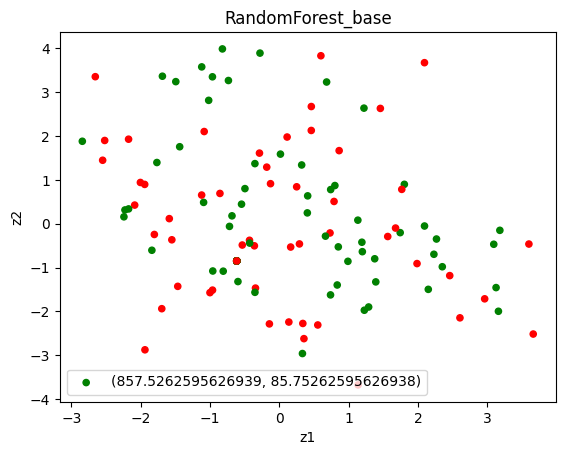

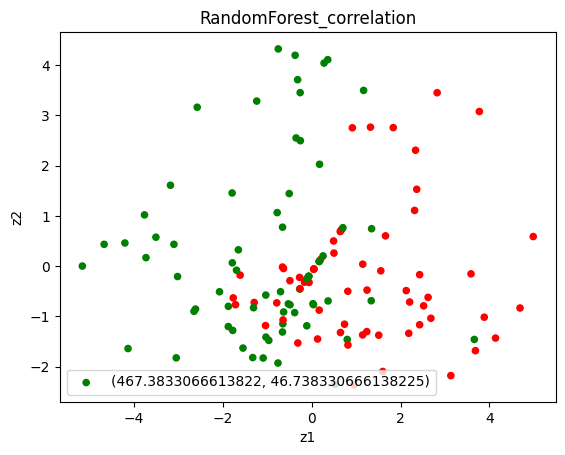

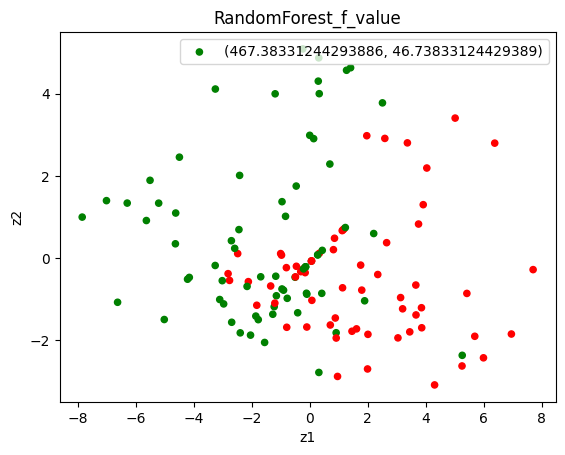

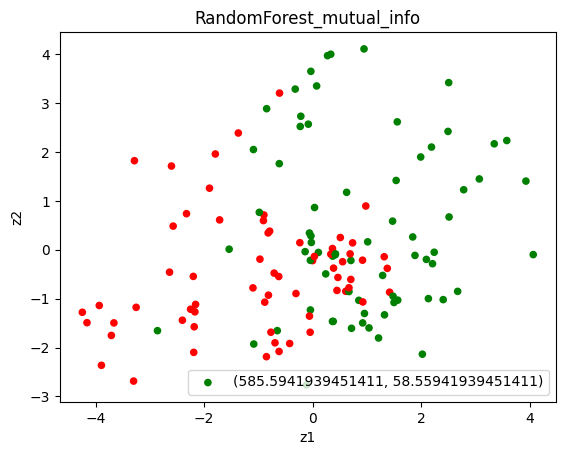

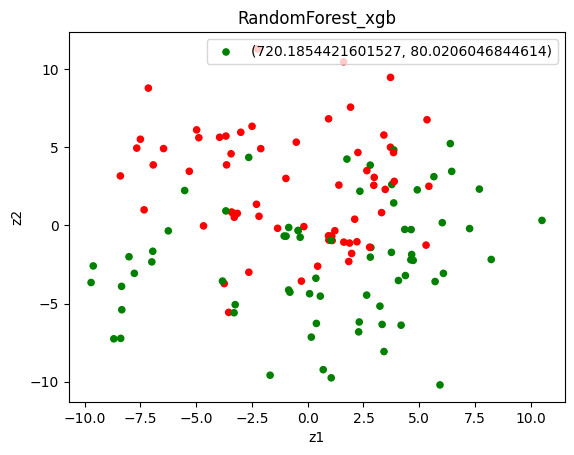

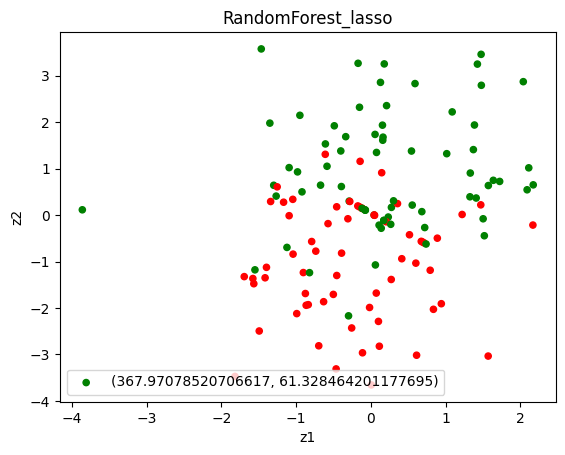

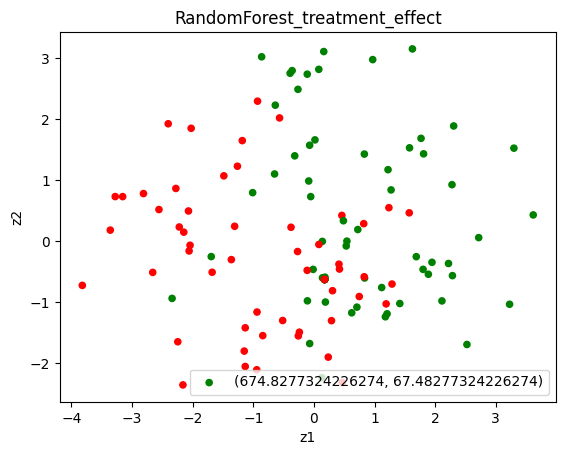

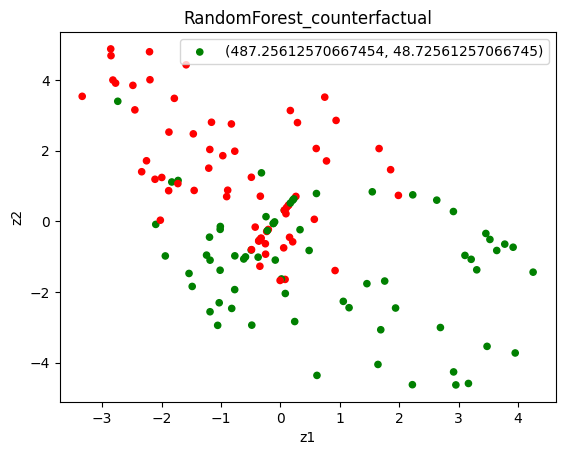

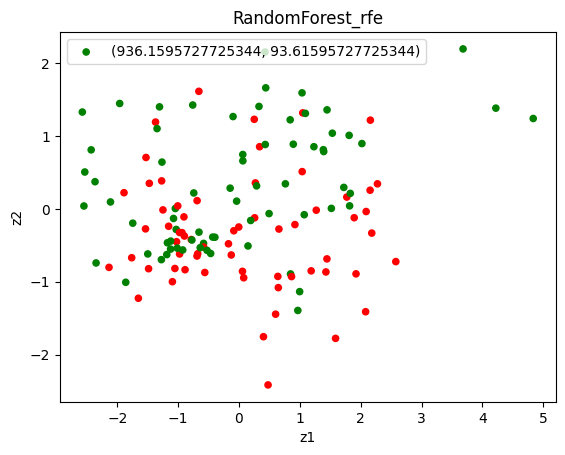

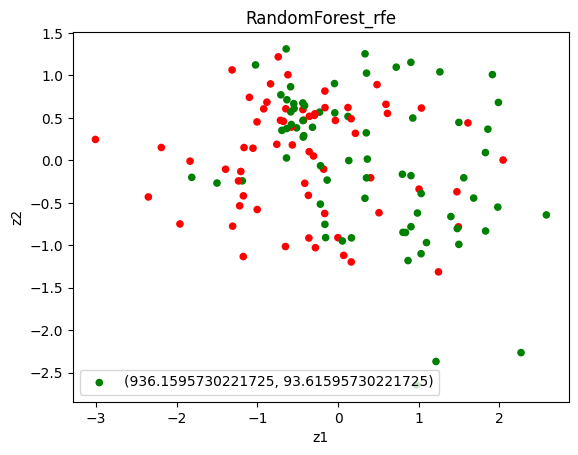

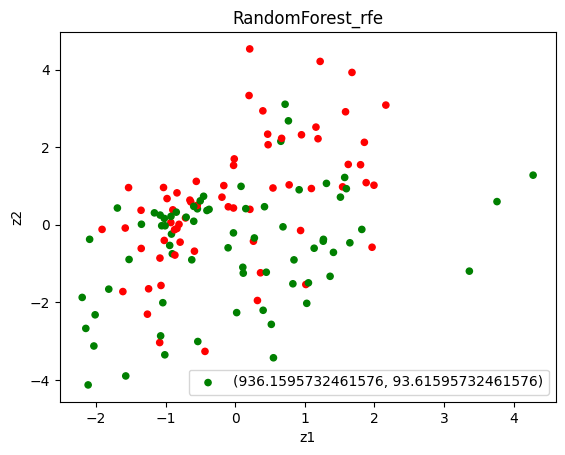

In [12]:
target_model = "RandomForest"
for selector in selectors:
    print("-------------------")
    print(selector.class_name)
    print("-------------------")
    features, target_bin = meta_learner.load_data(
        features_suffix="power",
        metrics_suffix="perf_abs",
        selector=selector,
        target_model=target_model
    )

    raw_metrics = meta_learner.load_metrics(suffix="raw").loc[:, target_model].to_frame(name=target_model)
    
    res = isa.pilot(
        features=features.iloc[:, :10],
        metrics=raw_metrics,
    )
    selectors_res.append(res)
    print(res.summary.sort_index(axis="index", ascending=True, inplace=False))
    plot(
        res=res,
        features=features.iloc[:, :10],
        target_bin=target_bin,
        selector_name=selector.class_name
    )

In [ ]:
target_model = "rtdl_FTTransformer"
for selector in selectors:
    print("-------------------")
    print(selector.class_name)
    print("-------------------")
    features, target_bin = meta_learner.load_data(
        features_suffix="power",
        metrics_suffix="perf_abs",
        selector=selector,
        target_model=target_model
    )

    raw_metrics = meta_learner.load_metrics(suffix="raw").loc[:, target_model].to_frame(name=target_model)
    
    res = isa.pilot(
        features=features.iloc[:, :10],
        metrics=raw_metrics,
    )
    selectors_res.append(res)
    print(res.summary.sort_index(axis="index", ascending=True, inplace=False))
    plot(
        res=res,
        features=features.iloc[:, :10],
        target_bin=target_bin,
        selector_name=selector.class_name
    )

In [ ]:
for res in selectors_res:
    print(res.error, res.summary[0])